# Data Analysis Notebook

This data analysis notebook is a collection of common methods shown using static analysis and visualizations.

### Imports

These are imports the notebook uses.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

We select a dataset from the datasets folder.

In [60]:
# specify the folder where the datasets are stored
datasets_folder = 'datasets/'

# Specify the file path to the CSV file containing the data
file_path = datasets_folder + 'fisher_iris.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the top 5 rows of the DataFrame
df.head()

,sepal.length,sepal.width,petal.length,petal.width,class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


### Data Normalization

First we must normalize the data frame for all numerical values we utilize min-max normalzation.
To perform min-max normalization on a numerical variable, you can use the following formula:

Normalized Value = (Value - Min) / (Max - Min)


In [61]:
# Get the column names of the DataFrame
columns = df.columns

# remove the 'class' column
columns = columns.drop('class')

df_normalized = df.copy()
# min max normalization
df_normalized[columns] = (df[columns] - df[columns].min()) / (df[columns].max() - df[columns].min())

### Color map and Figure size

We need to set a color map that is reactive to our class names, if it is medical such as positive or negative, or benign and malignant, we want red and green, if there are three classes we want standard red, green, blue, otherwise we want a consistent distribution.

In [62]:
fsize = (10, 6)
a = 0.4

class_names = df['class'].unique()

class_names = [name.lower() for name in class_names]
if len(class_names) == 2 and ('positive' in class_names or 'negative' in class_names) or \
    ('yes' in class_names or 'no' in class_names) or \
    ('true' in class_names or 'false' in class_names) or \
    ('1' in class_names or '0' in class_names) or \
    ('malignant' in class_names or 'benign' in class_names):
        cmap = sns.color_palette(['green', 'red'])
elif len(class_names) == 3:
    cmap = sns.color_palette('cool', 3)
else:
    cmap = sns.color_palette('viridis', len(class_names))


### Pairplot

We plot a pairplot to analyze binary comparison attribute distributions and scatterplots.

<Figure size 1000x600 with 0 Axes>

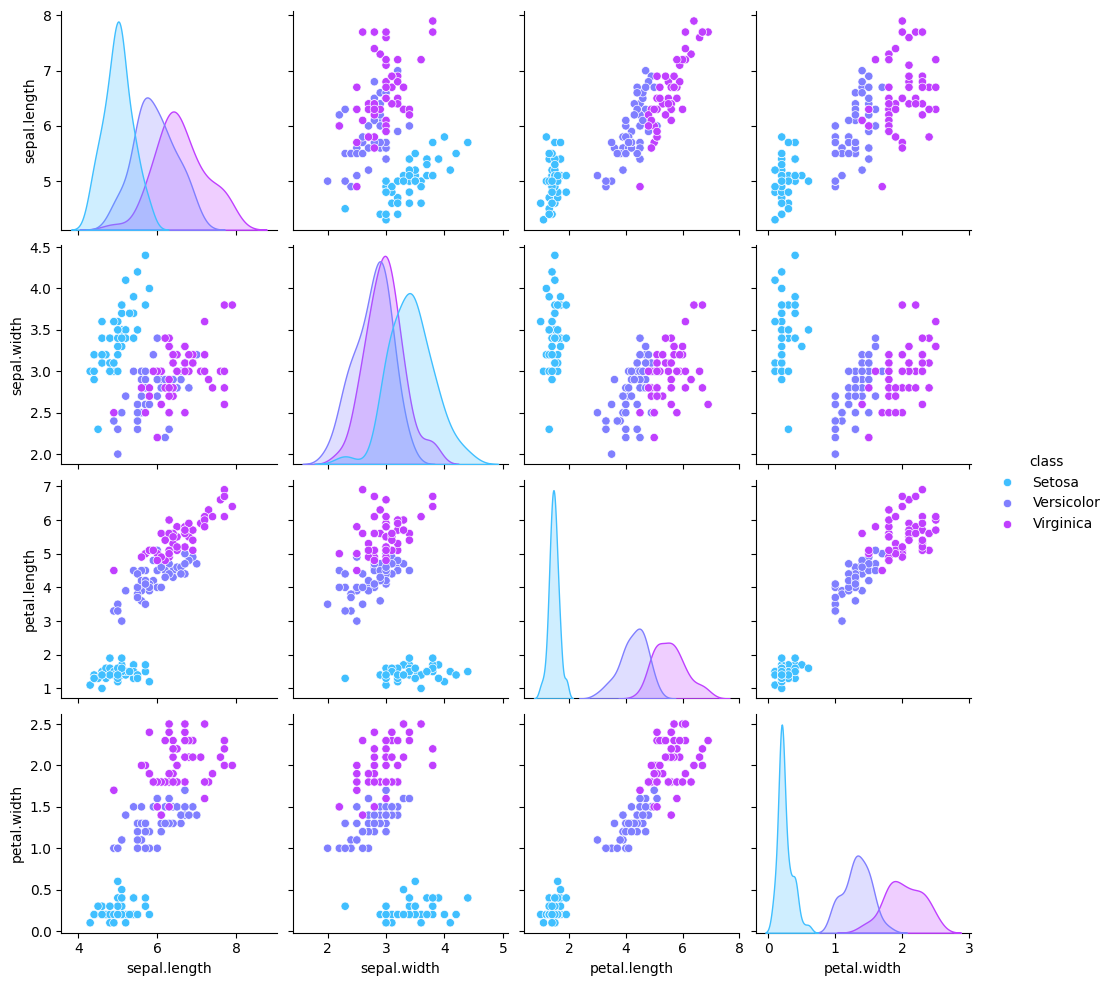

In [63]:
# set size
plt.figure(figsize=fsize)

# Create a pairplot of the DataFrame
sns.pairplot(df, hue='class', vars=columns, palette=cmap)

### Parallel coordinates

We plot the data in a lossless General Line Coordinate method called Parallel coordinates.

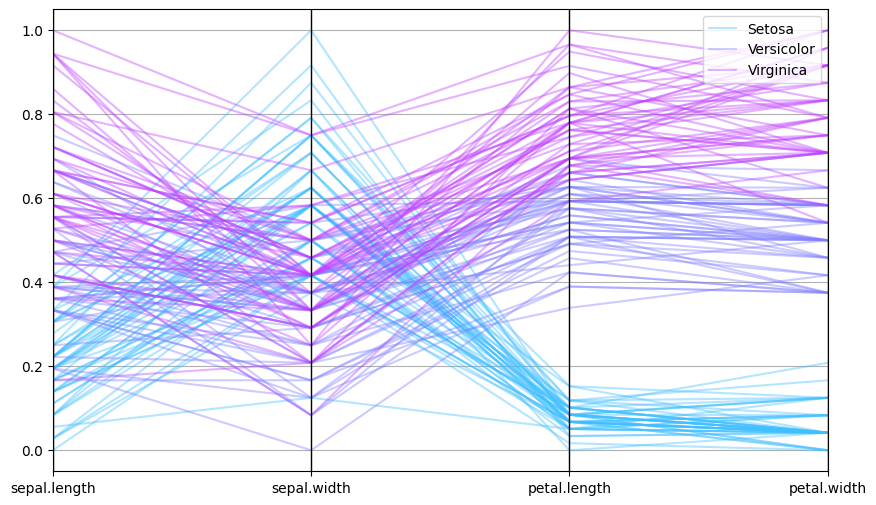

In [64]:
# set size
plt.figure(figsize=fsize)

# Plot the DataFrame in normalized parallel coordinates
pd.plotting.parallel_coordinates(df_normalized, 'class', color=cmap, alpha=a)

# Display the plot
plt.show()


### Andrew's Curves

A variant of Parallel coordinates using Fourier series.

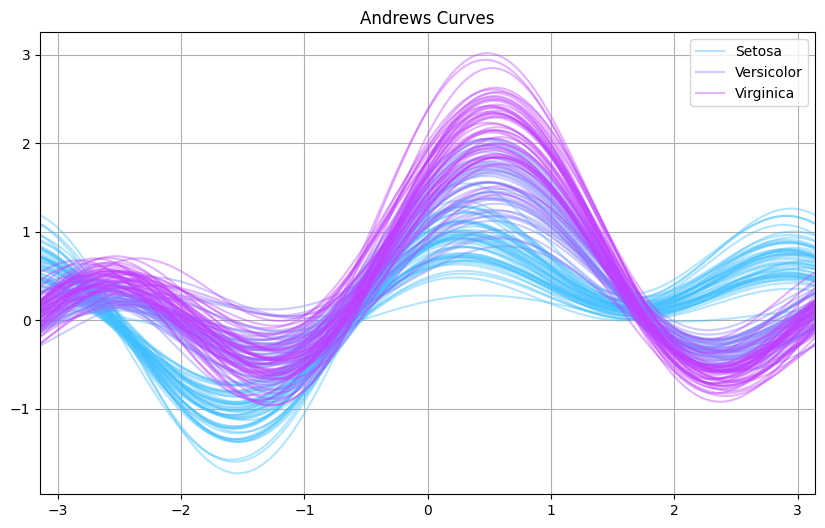

In [65]:
# set size
plt.figure(figsize=fsize)

# Plot the normalized DataFrame using Andrews Curves
pd.plotting.andrews_curves(df_normalized, 'class', color=cmap, alpha=a)

# Set the title of the plot
plt.title('Andrews Curves')

# Display the plot
plt.show()

### Radviz

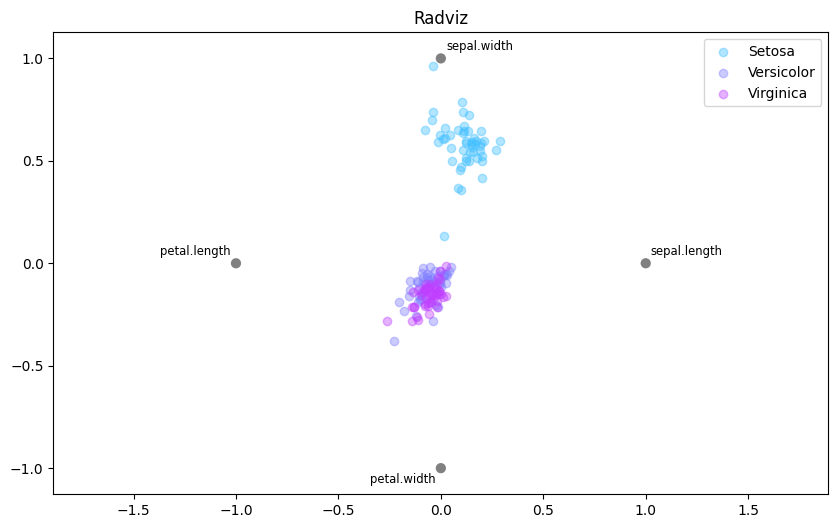

In [66]:
# set size
plt.figure(figsize=fsize)

# Create a Radviz plot of the DataFrame
pd.plotting.radviz(df_normalized, 'class', color=cmap, alpha=a)

# Set the title of the plot
plt.title('Radviz')

# Display the plot
plt.show()